# Tutorial Basics Noten Part 1: Einführung und Visualisierung

Inhaltsverzeichnis: 
1. Jupyter-Notebook: Grundlegende Funktionen
2. Laden von Dateien
3. Der xml-Parser
4. Pianorollendarstellung
5. Auswahl von Stimmen bzw. Takten
6. Vertiefung

Dieses  einführende Tutorial zeigt Ihnen den Aufbau und die Funktionsweise eines Jupyter-Notebooks und wie Sie die Jupyter-Notebooks für die Analyse von Notendaten nutzen können.

Auf dieser Grundlage zeigt Ihnen das Tutorial Part 2 Möglichkeiten einfacher statistischer Abfragen. 

### 1. Jupyter-Notebook: Grundlegende Funktionen

Ein Jupyter-Notebook ist eine Datei, die im Browser geöffnet und bearbeitet werden kann. Jedes Jupyter-Notebook besteht aus einer Folge von Textblöcken (Markdown cells) und Blöcken mit Python-Colde (Code cells). Beide Blöcke können von jedem User verändert und bearbeitet werden, indem innerhalb eines Blocks die Eingabetaste gedrückt wird. 
Eigene, veränderte Versionen des Notebooks können unter neuem Namen abgespeichert werden (Menu: File -> Save as...). 

WICHTIG: Die Befehle jeder einzelnen Code cell werden mit dem Run-Button ausgeführt. Während der Ausführung (die bei manchen Befehlen einige Sekunden dauern kann) wird oben auf dem Tab ein Sanduhr-Symbol angezeigt. Anschließend werden ggf. Ergebnisse (oder Fehlermeldungen) angezeigt und der Cursor springt zur nächsten Box. 
Gehen Sie in den Tutorials jeweils Code cell für Code cell durch, aktivieren Sie den Code mit dem Run-Button und warten Sie ab, was geschieht!

In den Code Cells werden alle Zeilen hinter einem Rautezeicheen (#) nicht ausgeführt; dies bietet die Möglichkeit, entweder Erläuterungen zum Code in den Code cells zu vermerken oder zusätzliche deaktivierte Befehle zu vermerken, die durch Löschen der Raute (und anschließendem Run) ausgeführt werden. 

In [1]:
# Mit den Befehlen können Sie selbstverständlich auch rechnen. 
 
21 * 7 + 1 
# Drücken Sie bitte dann auf 'Run'!

# Verändern Sie z.B. den folgenden Rechenbefehl:
# Drücken Sie bitte dann auf 'Run'!

148

Eine neue Cell wird mit dem +-Button oder den Menu-Punkt Insert erzeugt und kann dann im Menu als Markdown oder Code cell festgelegt werden. Hier können Sie Ihre eigenen Kommentare oder Befehle vermerken. (Und bitte nicht vergessen, das Notebook zuvor unter neuem Namen abzuspeichern!).  

Parallel zum Notebook läuft ein Command-Fenster ("Anaconda Prompt"), das Sie nicht weiter beachten müssen - das Sie aber bitte auch nicht schließen! Beenden Sie ein Notebook bitte mit dem Menu-Befehl "File" -> "Close and Halt", loggen Sie sich dann aus und schließen Sie erst zum Schluss das Command-Fenster. 

Jeder Start eines Jupyter Notebooks beginnt mit dem Import einer Reihe von Python-Bibliotheken, die für die Analyse erforderlich sind:  

In [2]:
import sys
import os
sys.path.append(os.getcwd().replace(os.path.join('music_xml_parser', 'ipynb'), ''))


import music_xml_parser as mp
from music21 import * 
import csv
from IPython.display import HTML, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mit diesen Befehlen wird der Kern von CAMAT, der 'music_xml_parser', 
# aber u.a. auch die python-Bibliotheken 'numpy' und 'pandas' für statische Auswertungen, 
# 'matplotlib' für grafische Darstellungen, 
# 'csv' für den Tabellenexport geladen 
# sowie 'music21' geladen.

# Mit den folgenden Befehlen wird die Formatierung für die Tabellen festgelegt, 
# die weiter unten dargestellt werden: 

pd.set_option('display.max_rows', 9999)
pd.set_option('display.max_columns', 9999)
pd.set_option('display.width', 9999)

# Durch den folgenden Befehl wird der Download von URLs aus dem Internet erlaubt: 
environment.set('autoDownload', 'allow')

### 2. Laden von Notendateien

Als nächstes wird eine Notendatei im xml-Format geladen und mit dem Namen 'xml_file' versehen. Dabei gibt es zwei Möglichkeiten: 
1. Eine Notendatei wird von der lokalen Festplatte geladen, der zuvor in den Ordner 'data' des 'music_xml_parser' gelegt wurde. Dann muss der Dateiname kopiert werden (in einfache Anführungszeichen). 
2. Eine Notendatei wird direkt aus dem Internet geladen, indem der URL kopiert wird (in einfache Anführungszeichen): 

In [3]:

xml_file = 'PrJode_Jos1102_COM_1-5_MissaLasol_002_00137.xml'
#xml_file = 'BaJoSe_BWV18_COM_5-5_CantataGle_004_00110.xml'
# xml_file = 'BeLuva_Op59_1-3_1-4_StringQuar_003_00129.xml'
#xml_file = 'PrJode_Jos1102_COM_1-5_MissaLasol_002_00137.xml'
#xml_file = 'BaJoSe_BWV18_COM_5-5_CantataGle_004_00110.xml'
# xml_file = 'BeLuva_Op59_1-3_1-4_StringQuar_003_00129.xml'

#xml_file = 'MoWo_K279_COM_1-3_PianoSonat_003_00920.xml'
# xml_file = 'https://analyse.hfm-weimar.de/database/03/BoMaEn_Op115_11-22_COM_ThemeetVar_003_00181.xml'
# xml_file = 'https://analyse.hfm-weimar.de/database/03/MoWo_K279_COM_1-3_PianoSonat_003_00920.xml'
#xml_file = 'https://analyse.hfm-weimar.de/database/04/BaJoSe_BWV7_COM_2-7_CantataChr_004_00038.xml'

#xml_file = 'MoWo_K279_COM_1-3_PianoSonat_003_00920.xml'
# xml_file = 'https://analyse.hfm-weimar.de/database/03/BoMaEn_Op115_11-22_COM_ThemeetVar_003_00181.xml'
# xml_file = 'https://analyse.hfm-weimar.de/database/03/MoWo_K279_COM_1-3_PianoSonat_003_00920.xml'
#xml_file = 'https://analyse.hfm-weimar.de/database/04/BaJoSe_BWV7_COM_2-7_CantataChr_004_00038.xml'
# xml_file = 'https://analyse.hfm-weimar.de/database/03/MoWo_K171_COM_1-4_StringQuar_003_00867.xml'

### 3. Der xml-Parser

Der **xml-Parser** ist ein Python-Modul für die Verarbeitung der MusicXML-Files mit diversen Features, u.a. für den Export und Visualizierung verschiedener statistischer Informationen. Das Grundkonzept des Moduls besteht in der Speicherung der gesamten in der Notendatei vorhandenen Informationen in Form eines [Pandas-Dataframes](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe), welches sehr effiziente Kalkulationen und Datenverwaltung der geparsten Daten ermöglicht. 

**Parser** verfügt über eine intern festgelegte Datenstruktur, die sich bei der Exktraktion der zip-Datei bereits auf Ihrem Rechner wiederfindet (Ordner *music_xml_parser*). Darin gibt es drei Ordner:

1. **core** enthält alle programmrelevanten Python-Scripte. //Bitte nicht verändern!!//

2. **data** enthält die Ordner
- **xmls_to_parse**. Darin liegen alle xml-Files, die beim Laden direkt (also ohne weitere Pfadangabe) eingelesen werden können. Sie können selbst xml-Dateien in den Ordner legen, oder aber Dateien direkt aus dem Internet einlesen.  
- **exports**: Hier liegen alle Dateien, die Sie im Laufe Ihrer Arbeit mit dem Jupyter-Notebooks selbst generiert haben, z.B. Tabellen (.csv) oder Grafiken (.png). 

3. **ipynb** - enthält alle Jupyter-Notebooks (.ipynb); modifizierte Notebooks sollten ebenfalls hier gespeichert werden. 

@ Christon: export files seems to be saved not in the *export*-folder but in the *ipynb*-Folder. Please fix the bug!

Durch den folgenden Befehl wird aus der Notendatei ('xml_file', s. oben) der Pandas-Dataframe mit der Bezeichnung 'm_df' generiert. 

Durch den Befehl 'm_df' werden die Daten als Tabelle im Browser dargestellt. 

ACHTUNG: Bei großen Notendateien benötigt diese Darstellung viel Speicherplatz; der Befehl sollte dann übersprungen werden. 

In [4]:

m_df = mp.parse.with_xml_file(file=xml_file,
                              save_file_name=None,
                              do_save=True)

# save_file_name == None then same xml filename is used .csv
# do_save will save as .csv in exports

/Users/chris/DocumentLocal/workspace/hfm/scripts_in_progress/xml_parser/music_xml_parser/core/xml_parser.py:885: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 0 in meau or '0' in meau:


In [5]:
m_df

,Onset,Duration,Pitch,Octave,MIDI,Measure,Voice,PartID,PartName,MeasureOnset,TimeSignature,TimeSignatureAdjusted,Upbeat,UpbeatMeasure,ChordTag,TieType,GraceTag
0,0.0,8.0,A,4,69.0,1,0,1,Superius,0.0,3/1,12/4,none,none,none,none,none
1,8.0,4.0,G,4,67.0,1,0,1,Superius,0.0,3/1,12/4,none,none,none,none,none
2,12.0,8.0,F,4,65.0,2,0,1,Superius,12.0,3/1,12/4,none,none,none,none,none
3,20.0,4.0,D,4,62.0,2,0,1,Superius,12.0,3/1,12/4,none,none,none,none,none
4,24.0,4.0,E,4,64.0,3,0,1,Superius,24.0,3/1,12/4,none,none,none,none,none
5,28.0,4.0,A,4,69.0,3,0,1,Superius,24.0,3/1,12/4,none,none,none,none,none
6,32.0,4.0,G,4,67.0,3,0,1,Superius,24.0,3/1,12/4,none,none,none,none,none
7,36.0,8.0,F,4,65.0,4,0,1,Superius,36.0,3/1,12/4,none,none,none,none,none
8,44.0,4.0,D,4,62.0,4,0,1,Superius,36.0,3/1,12/4,none,none,none,none,none
9,48.0,2.0,E,4,64.0,5,0,1,Superius,48.0,3/1,12/4,none,none,none,none,none


### 4. Pianorollendarstellung

Im folgenden Codefenster aktivieren Sie die Pianorollendarstellung.

Dabei gibt es zwei Möglichkeiten: 
1. Im Browser ("inline"): Dies erfordert in Abhängigkeit von der Datengröße viel Speicherplatz. 
2. In einem externen Pop-Up-Fenster, d.h. in der Symbolleiste ihres Desktops taucht ein neues Icon auf, das Sie anklicken müssen: Hierzu muss zunächst der Befehal '%matplotlib' aktiviert werden - durch Löschung des #-Zeichens davor. Anschließend werden //alle// Grafiken extern dargestellt. Um sie wieder im Browser darzustellen, muss der Befehl '%matplotlib inline' eingegeben werden. 

TIPP: Öffnen Sie das externe Fenster (über das Icon in der Desktop-Symbolleiste unten) und navigieren Sie anschließend mit Ihrer Maus in der Grafik; über das Rädchen können Sie die horizontale Ausdehnung der Grafik verändern. Anschließend können Sie die gewählte Darstellung als Bilddatei (.png) abspeichern!

@ Egor: Bitte erläutere doch kurz die Parameter des folgenden Befehls!!

In [6]:
%matplotlib

m_df = mp.parse.with_xml_file(file=xml_file, plot_pianoroll=False, plot_inline_ipynb=False)
m_df
#file: str, only file is manditory

#plot_pianoroll: bool = False,
#plot_inline_ipynb: bool=False,
#save_at: str = None,
#save_file_name: str = None,
#do_save: bool = False,
#x_axis_res=2,
#get_measure_onset:bool=False, 
#get_upbeat_info=False,
#filter_dict=None


# Definition der Variable für Pandas-Dataframe (m_df) sowie Beschreibung der verwendeten Parameter, 
# Angaben in der Regel mit True/False

# plot_pianoroll - Piano-Roll als Grafik zeichnen
# plot_inline_ipynb - Piano-Roll Als Grafik innnerhalb von Jupyter Notebook (True) oder als extra Fenster (False)
# save_at 
# save_file_name
# do_save
# x_axis_res - Auflösung der X-Achse als Teiler der Viertelnote (2=0.5 Viertelnote)
# get_measure_onset - 



Using matplotlib backend: MacOSX


/Users/chris/DocumentLocal/workspace/hfm/scripts_in_progress/xml_parser/music_xml_parser/core/xml_parser.py:885: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 0 in meau or '0' in meau:


,Onset,Duration,Pitch,Octave,MIDI,Measure,Voice,PartID,PartName,MeasureOnset,TimeSignature,TimeSignatureAdjusted,Upbeat,UpbeatMeasure,ChordTag,TieType,GraceTag
0,0.0,8.0,A,4,69.0,1,0,1,Superius,0.0,3/1,12/4,none,none,none,none,none
1,8.0,4.0,G,4,67.0,1,0,1,Superius,0.0,3/1,12/4,none,none,none,none,none
2,12.0,8.0,F,4,65.0,2,0,1,Superius,12.0,3/1,12/4,none,none,none,none,none
3,20.0,4.0,D,4,62.0,2,0,1,Superius,12.0,3/1,12/4,none,none,none,none,none
4,24.0,4.0,E,4,64.0,3,0,1,Superius,24.0,3/1,12/4,none,none,none,none,none
5,28.0,4.0,A,4,69.0,3,0,1,Superius,24.0,3/1,12/4,none,none,none,none,none
6,32.0,4.0,G,4,67.0,3,0,1,Superius,24.0,3/1,12/4,none,none,none,none,none
7,36.0,8.0,F,4,65.0,4,0,1,Superius,36.0,3/1,12/4,none,none,none,none,none
8,44.0,4.0,D,4,62.0,4,0,1,Superius,36.0,3/1,12/4,none,none,none,none,none
9,48.0,2.0,E,4,64.0,5,0,1,Superius,48.0,3/1,12/4,none,none,none,none,none


In [7]:
%matplotlib inline

Was können Sie auf der Pianorollen-Grafik erkennen?

### 5. Auswahl von Stimmen bzw. Takten

Durch den folgenden Befehl können flexibel Stimmen und Takte für grafische Darstellungen oder Abfragen ausgewählt werden. 

Im folgenden Beispielen werden die ersten beiden Stimmen ('PartID':'1-2') und davon die Takte 2-5 ('Measure':'2-5') für eine Pianorollendarstellung ausgewählt. Die Darstellung erfolgt extern. 

/Users/chris/DocumentLocal/workspace/hfm/scripts_in_progress/xml_parser/music_xml_parser/core/xml_parser.py:885: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 0 in meau or '0' in meau:


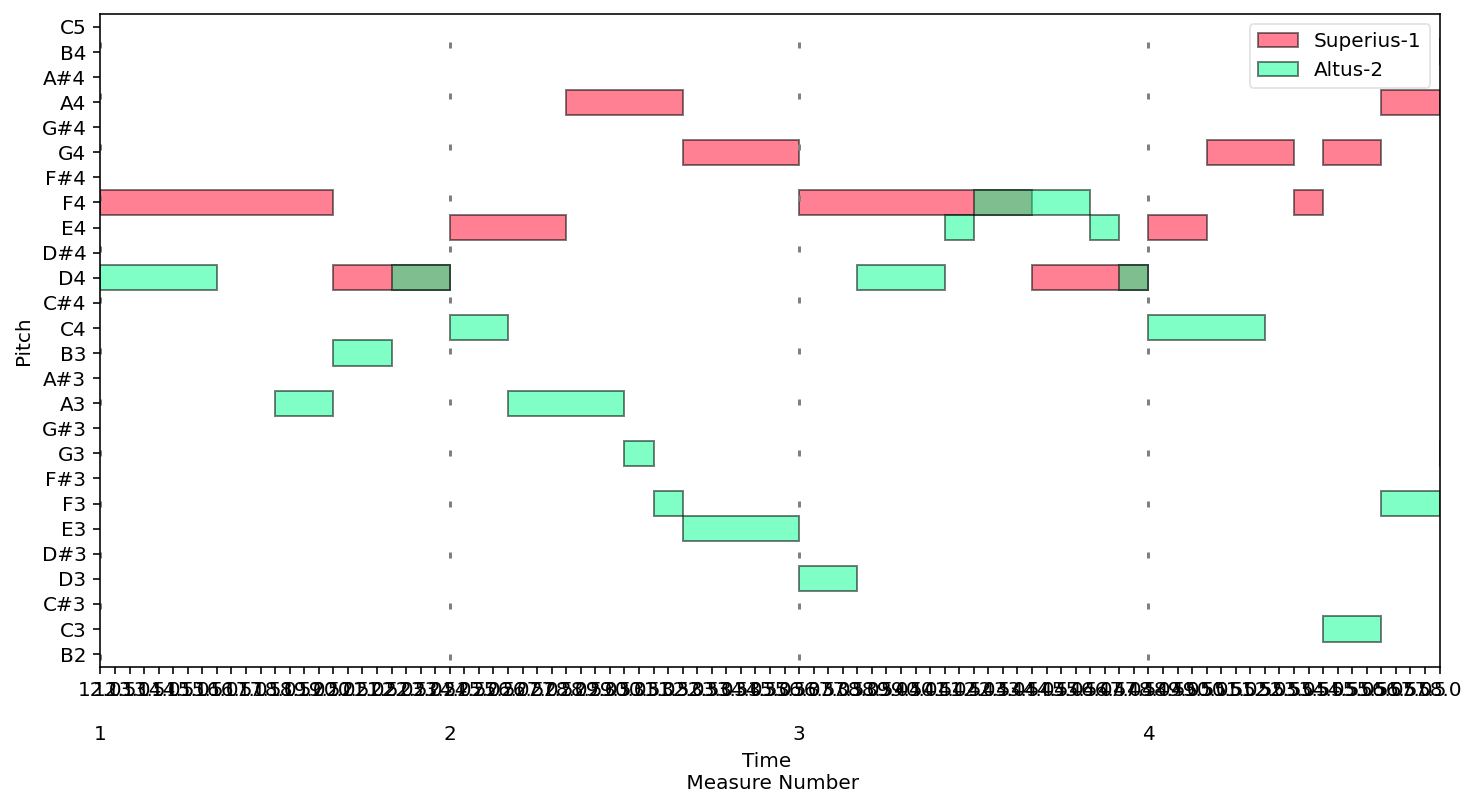

In [8]:
#%matplotlib
%matplotlib inline
##Testing filter
#xml_file = 'PrJode_Jos1102_COM_1-5_MissaLasol_002_00137.xml'
# xml_file = 'https://analyse.hfm-weimar.de/database/03/MoWo_K279_COM_1-3_PianoSonat_003_00920.xml'


filter_dict_t = { 'Measure':'2-5', 'PartID':'1-2'}


m_df_2 = mp.parse.with_xml_file(file=xml_file,
                                plot_pianoroll=True,
                                plot_inline_ipynb=True,
                                filter_dict=filter_dict_t)




In [9]:
m_df_2

,Onset,Duration,Pitch,Octave,MIDI,Measure,Voice,PartID,PartName,MeasureOnset,TimeSignature,TimeSignatureAdjusted,Upbeat,UpbeatMeasure,ChordTag,TieType,GraceTag
0,12.0,8.0,F,4,65.0,2,0,1,Superius,12.0,3/1,12/4,none,none,none,none,none
1,20.0,4.0,D,4,62.0,2,0,1,Superius,12.0,3/1,12/4,none,none,none,none,none
2,24.0,4.0,E,4,64.0,3,0,1,Superius,24.0,3/1,12/4,none,none,none,none,none
3,28.0,4.0,A,4,69.0,3,0,1,Superius,24.0,3/1,12/4,none,none,none,none,none
4,32.0,4.0,G,4,67.0,3,0,1,Superius,24.0,3/1,12/4,none,none,none,none,none
5,36.0,8.0,F,4,65.0,4,0,1,Superius,36.0,3/1,12/4,none,none,none,none,none
6,44.0,4.0,D,4,62.0,4,0,1,Superius,36.0,3/1,12/4,none,none,none,none,none
7,48.0,2.0,E,4,64.0,5,0,1,Superius,48.0,3/1,12/4,none,none,none,none,none
8,50.0,3.0,G,4,67.0,5,0,1,Superius,48.0,3/1,12/4,none,none,none,none,none
9,53.0,1.0,F,4,65.0,5,0,1,Superius,48.0,3/1,12/4,none,none,none,none,none


In [10]:
# m_df_2

# Wenn Sie diesen Befehl aktivieren, 
# wird das Pandas-Dataframe des gewählten Ausschnitts als Tabelle dargestellt. 

Nun der Vergleich mit der Altus-Stimme. Was lässt sich hieraus über die Art der Fortschreitung der beiden Stimmen sagen? Ist sie ähnlich oder unterschiedlich?

### 6. Vertiefung

Vergleichen Sie die Pianorollendarstellung von verschiedenen Stimmen der Komposition. Was fällt auf? 

Generieren Sie Pianorollendarstellungen von anderen Kompositionen und machen Sie sich auf diese Weise mit dem Jupyter-Notebook vertraut. 